# SLOPE Indicator Example

In [1]:
import yfinance as yf

from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, Volume

from mplchart.indicators import SLOPE, TSF, QSF
from mplchart.samples import sample_prices

In [2]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices = sample_prices()
prices.info()


$AAPL: possibly delisted; no price data found  (period=5y)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10960 entries, 1980-12-12 to 2024-06-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    10960 non-null  float64
 1   high    10960 non-null  float64
 2   low     10960 non-null  float64
 3   close   10960 non-null  float64
 4   volume  10960 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 513.8 KB


In [3]:
SLOPE(20) @ prices.close


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
No implementation of function Function(<function calc_slope.<locals>.func at 0x1069a3310>) found for signature:
 
 >>> func(array(float64, 1d, C))
 
There are 2 candidate implementations:
  - Of which 2 did not match due to:
  Overload in function 'register_jitable.<locals>.wrap.<locals>.ov_wrap': File: numba/core/extending.py: Line 161.
    With argument(s): '(array(float64, 1d, C))':
   Rejected as the implementation raised a specific error:
     TypingError: Failed in nopython mode pipeline (step: nopython frontend)
   Use of unsupported NumPy function 'numpy.polyfit' or unsupported use of the function.
   
   File "../src/mplchart/library.py", line 246:
       def func(xs):
           <source elided>
   
           return np.polyfit(xx, xs, 1)[0]
           ^
   
   During: typing of get attribute at /Users/frederic/Projects/mplchart/src/mplchart/library.py (246)
   
   File "../src/mplchart/library.py", line 246:
       def func(xs):
           <source elided>
   
           return np.polyfit(xx, xs, 1)[0]
           ^

  raised from /Users/frederic/Projects/mplchart/.venv/lib/python3.9/site-packages/numba/core/typeinfer.py:1091

During: resolving callee type: Function(<function calc_slope.<locals>.func at 0x1069a3310>)
During: typing of call at /Users/frederic/Projects/mplchart/.venv/lib/python3.9/site-packages/pandas/core/window/numba_.py (72)


File "../.venv/lib/python3.9/site-packages/pandas/core/window/numba_.py", line 72:
    def roll_apply(
        <source elided>
            if len(window) - count_nan >= minimum_periods:
                result[i] = numba_func(window, *args)
                ^


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
No implementation of function Function(<function calc_slope.<locals>.func at 0x304b66f70>) found for signature:
 
 >>> func(array(float64, 1d, C))
 
There are 2 candidate implementations:
  - Of which 2 did not match due to:
  Overload in function 'register_jitable.<locals>.wrap.<locals>.ov_wrap': File: numba/core/extending.py: Line 161.
    With argument(s): '(array(float64, 1d, C))':
   Rejected as the implementation raised a specific error:
     TypingError: Failed in nopython mode pipeline (step: nopython frontend)
   Use of unsupported NumPy function 'numpy.polyfit' or unsupported use of the function.
   
   File "../src/mplchart/library.py", line 246:
       def func(xs):
           <source elided>
   
           return np.polyfit(xx, xs, 1)[0]
           ^
   
   During: typing of get attribute at /Users/frederic/Projects/mplchart/src/mplchart/library.py (246)
   
   File "../src/mplchart/library.py", line 246:
       def func(xs):
           <source elided>
   
           return np.polyfit(xx, xs, 1)[0]
           ^

  raised from /Users/frederic/Projects/mplchart/.venv/lib/python3.9/site-packages/numba/core/typeinfer.py:1091

During: resolving callee type: Function(<function calc_slope.<locals>.func at 0x304b66f70>)
During: typing of call at /Users/frederic/Projects/mplchart/.venv/lib/python3.9/site-packages/pandas/core/window/numba_.py (72)


File "../.venv/lib/python3.9/site-packages/pandas/core/window/numba_.py", line 72:
    def roll_apply(
        <source elided>
            if len(window) - count_nan >= minimum_periods:
                result[i] = numba_func(window, *args)
                ^


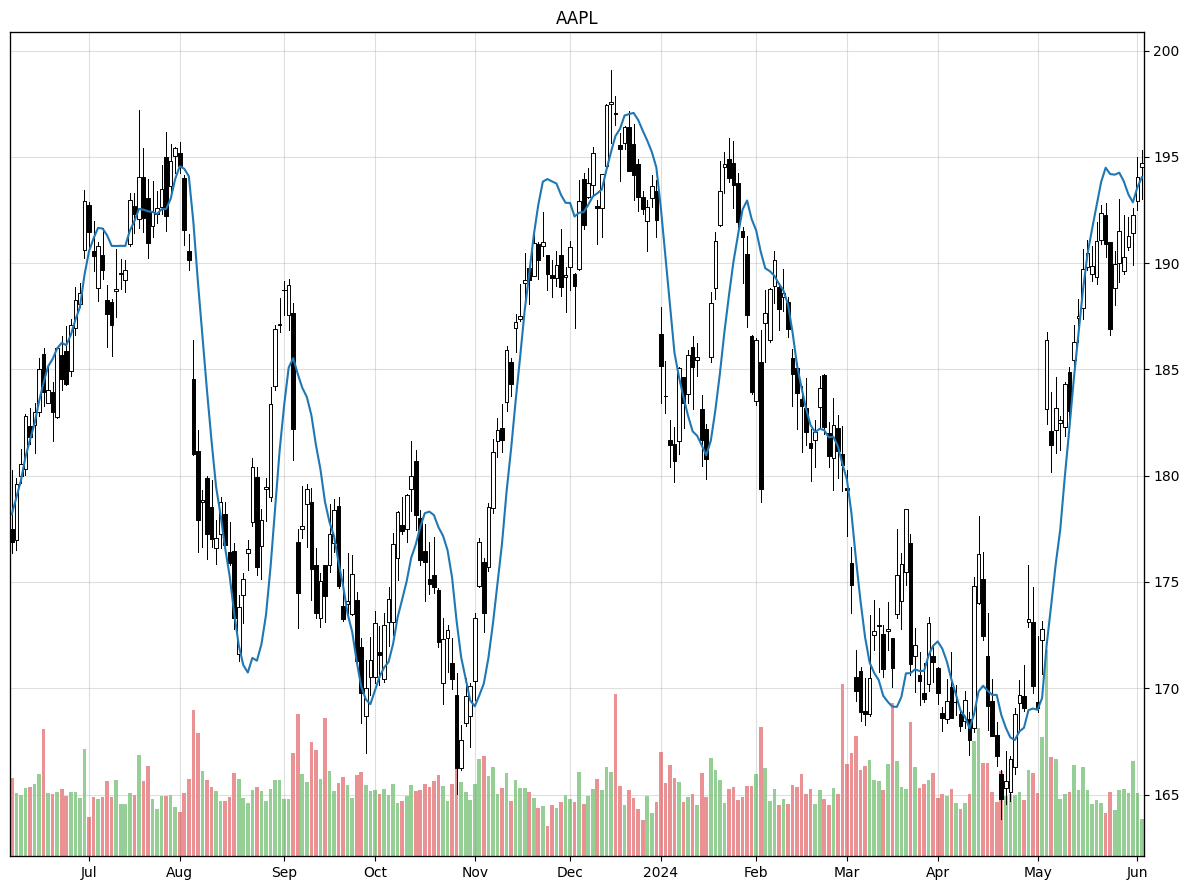

In [4]:
max_bars = 250

indicators = [
    Candlesticks(),
    TSF(20),
    Volume(),
    SLOPE(20),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)